<a href="https://colab.research.google.com/github/VIHAN-droid/AI-ML-PROJECT/blob/main/SUPERVISED%20LEARNING/Decision%20Tree/Dec_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_iris
x,y = load_iris(return_X_y=True,as_frame=True)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1,random_state=2)

dtc = DecisionTreeClassifier()
dtc.fit(x_train , y_train)
y_pred = dtc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.50      1.00      0.67         1
           2       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.83      0.92      0.84        15
weighted avg       0.97      0.93      0.94        15



In [8]:
dtc.feature_importances_

array([0.        , 0.0148662 , 0.51158601, 0.47354778])

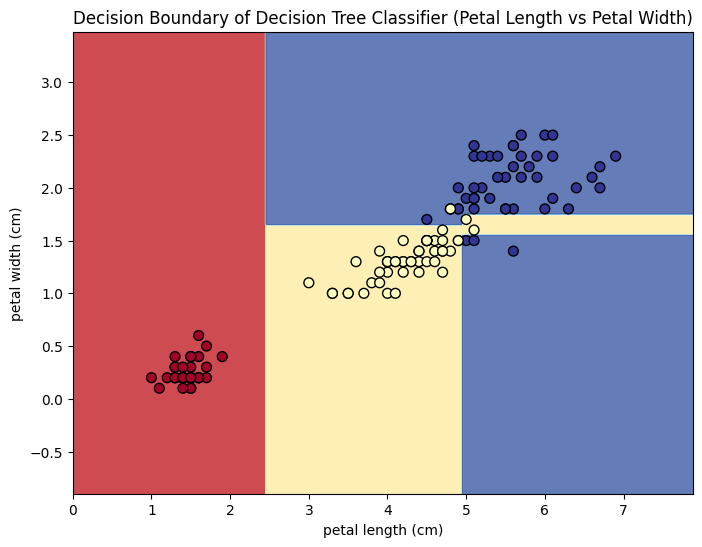

In [10]:
# Decision Boundary Plot on petal length and its width

import matplotlib.pyplot as plt

feature1_index = 2
feature2_index = 3

# Create a meshgrid to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = x.iloc[:, feature1_index].min() - 1, x.iloc[:, feature1_index].max() + 1
y_min, y_max = x.iloc[:, feature2_index].min() - 1, x.iloc[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Predict the class for each point in the meshgrid
X_plot = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[x.columns[feature1_index], x.columns[feature2_index]])

for col in x.columns:
    if col not in X_plot.columns:
        X_plot[col] = x_train[col].mean() # Use mean from training data

X_plot = X_plot[x.columns] # Ensure column order is correct

Z = dtc.predict(X_plot)

# Reshape the predictions to match the meshgrid
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=.8)

# Plot also the training points
plt.scatter(x_train.iloc[:, feature1_index], x_train.iloc[:, feature2_index], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='black', s=50)

plt.xlabel(x.columns[feature1_index])
plt.ylabel(x.columns[feature2_index])
plt.title("Decision Boundary of Decision Tree Classifier (Petal Length vs Petal Width)")
plt.show()

In [11]:
# Currently this is a case of overfitting
# Solution ->

In [25]:
dtc2 = DecisionTreeClassifier(min_samples_split=60)
dtc2.fit(x_train , y_train)
y_pred = dtc2.predict(x_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.50      1.00      0.67         1
           2       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.83      0.92      0.84        15
weighted avg       0.97      0.93      0.94        15



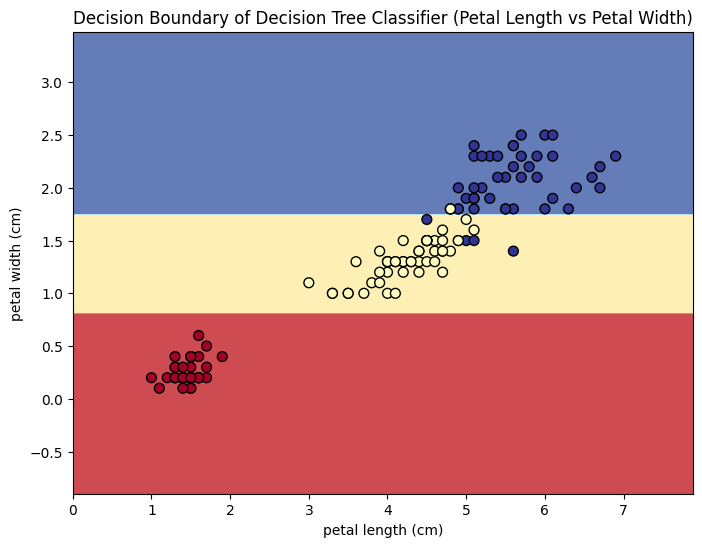

In [27]:
# Decision Boundary Plot on petal length and its width

import matplotlib.pyplot as plt

feature1_index = 2
feature2_index = 3

# Create a meshgrid to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = x.iloc[:, feature1_index].min() - 1, x.iloc[:, feature1_index].max() + 1
y_min, y_max = x.iloc[:, feature2_index].min() - 1, x.iloc[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Predict the class for each point in the meshgrid
X_plot = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[x.columns[feature1_index], x.columns[feature2_index]])

for col in x.columns:
    if col not in X_plot.columns:
        X_plot[col] = x_train[col].mean() # Use mean from training data

X_plot = X_plot[x.columns] # Ensure column order is correct

Z = dtc2.predict(X_plot)

# Reshape the predictions to match the meshgrid
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=.8)

# Plot also the training points
plt.scatter(x_train.iloc[:, feature1_index], x_train.iloc[:, feature2_index], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='black', s=50)

plt.xlabel(x.columns[feature1_index])
plt.ylabel(x.columns[feature2_index])
plt.title("Decision Boundary of Decision Tree Classifier (Petal Length vs Petal Width)")
plt.show()